In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_excel("data/한국관광데이터/kto_201001.xlsx", header=1, 
                   skipfooter=4,
                   usecols="A:G")
df

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131,18238,421,4339,80916,433045
1,일본,202825,1750,89,549,3971,209184
2,대만,35788,41,17,37,516,36399
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
...,...,...,...,...,...,...,...
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537


In [18]:
total=[]
for y in range(2010, 2021):
    for m in range(1,13):
        if y == 2020 and m == 6:
            break
        year = str(y)
        month = str(m).zfill(2) #부족하면 0으로라도 채워서 두자리로 만들어라
        df = pd.read_excel(f'data/한국관광데이터/kto_{year}{month}.xlsx', header=1,skipfooter=4)

        df['MONTH'] = month
        df["YEAR"] = year

        total.append(df)

In [19]:
df = pd.concat(total, ignore_index=True)
df

,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%),MONTH,YEAR
0,아시아주,329131,18238,421,4339,80916,433045,474653,-8.8,76.0,01,2010
1,일본,202825,1750,89,549,3971,209184,237816,-12.0,36.7,01,2010
2,대만,35788,41,17,37,516,36399,37425,-2.7,6.4,01,2010
3,홍콩,13874,55,0,21,595,14545,25207,-42.3,2.6,01,2010
4,마카오,554,0,0,0,0,554,955,-42.0,0.1,01,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
8370,아프리카 기타,3,1,3,6,118,131,3214,-95.9,0.4,05,2020
8371,기타대륙,1,0,0,0,3,4,72,-94.4,0.0,05,2020
8372,국적미상,1,0,0,0,3,4,72,-94.4,0.0,05,2020
8373,교포소계,0,0,0,0,790,790,18788,-95.8,2.6,05,2020


In [20]:
china = df[df['국적'] == '중국']
china

,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%),MONTH,YEAR
18,중국,40425,11930,55,2751,36091,91252,93007,-1.9,16.0,01,2010
85,중국,60590,7907,68,29546,42460,140571,127979,9.8,22.0,02,2010
152,중국,50330,13549,174,14924,62480,141457,111915,26.4,18.4,03,2010
219,중국,84252,13306,212,2199,47711,147680,107872,36.9,20.2,04,2010
286,중국,89056,12325,360,2931,49394,154066,86392,78.3,21.1,05,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
8058,중국,393336,2813,99,10433,75000,481681,392814,22.6,37.8,01,2020
8125,중국,49520,715,11,20753,33087,104086,453379,-77.0,15.2,02,2020
8192,중국,5040,115,2,7388,4050,16595,487623,-96.6,19.9,03,2020
8259,중국,522,71,0,1112,2230,3935,493250,-99.2,13.4,04,2020


<Axes: xlabel='MONTH', ylabel='YEAR'>

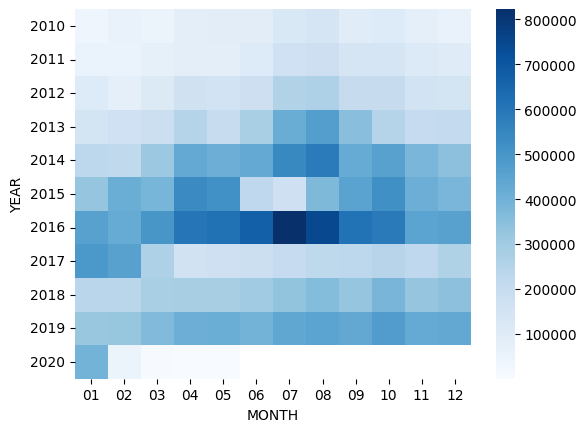

In [23]:
result = china.pivot_table(index= 'YEAR', columns='MONTH',
                  values='관광', aggfunc='sum')

sns.heatmap(result, cmap = 'Blues')